In [2]:
import random
import CanalBSC
import HammingCodifier
import HammingDecodifier
import OwnCodifier
import OwnDecodifier
import numpy as np
import matplotlib.pyplot as plt

hc = HammingCodifier.HammingCodifier()
hd = HammingDecodifier.HammingDecodifier()

oc = OwnCodifier.OwnCodifier()
od = OwnDecodifier.OwnDecodifier()

In [3]:
def generate1MBits():
    return [random.randint(0, 1) for _ in range(1000000)]

def split_into_4bit_subvectors(bits):
    subvectors = []
    for i in range(0, len(bits), 4):
        subvectors.append(bits[i:i+4])
    return subvectors

def split_into_5bit_subvectors(bits):
    subvectors = []
    for i in range(0, len(bits), 5):
        subvectors.append(bits[i:i+5])
    return subvectors

def testHamming(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        codified = hc.codify(subvector.copy())
        received = cBSC.canal(codified.copy())
        decoded = hd.decodify(received.copy())
        decoded = decoded[:len(subvector)]
        for i in range(len(subvector)):
            if subvector[i] != decoded[i]:
                numErrors += 1
    return numErrors/1000000

def testOwn(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        codified = oc.codify(subvector.copy())
        received = cBSC.canal(codified.copy())
        decoded = od.decodify(received.copy())
        decoded = decoded[:len(subvector)]
        for i in range(len(subvector)):
            if subvector[i] != decoded[i]:
                numErrors += 1
    return numErrors/1000000

def testChanel(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        received = cBSC.canal(subvector.copy())
        for i in range(len(subvector)):
            if subvector[i] != received[i]:
                numErrors += 1
    return numErrors/1000000

In [4]:
bits = generate1MBits()
subvectors4 = split_into_4bit_subvectors(bits)
subvectors5 = split_into_5bit_subvectors(bits)
# probs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001]
probs = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001]
oerros = []
herros = []
cerros = []

In [5]:
for(p) in probs:
    oerros.append(testOwn(p, subvectors5))
    herros.append(testHamming(p, subvectors4))
    cerros.append(testChanel(p, subvectors4))

In [12]:
testOwn(0.003, subvectors5)

0.000103

In [16]:
testHamming(0.0035, subvectors4)

0.000101

In [6]:
print(probs)
print(oerros)
print(herros)
print(cerros)

[0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 5e-05, 2e-05, 1e-05]
[0.499004, 0.456639, 0.410378, 0.36251, 0.309524, 0.252345, 0.19165, 0.128769, 0.069144, 0.020433, 0.003626, 0.000978, 0.000247, 3.4e-05, 1.1e-05, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.50006, 0.463661, 0.421622, 0.375019, 0.321967, 0.261657, 0.19633, 0.128307, 0.066123, 0.019208, 0.003441, 0.000887, 0.000232, 4.2e-05, 1.1e-05, 2e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.499299, 0.450576, 0.400736, 0.350456, 0.299847, 0.249491, 0.199849, 0.150604, 0.100341, 0.050324, 0.019982, 0.009946, 0.004966, 0.001992, 0.000995, 0.000507, 0.000212, 8.6e-05, 5e-05, 2.9e-05, 8e-06]


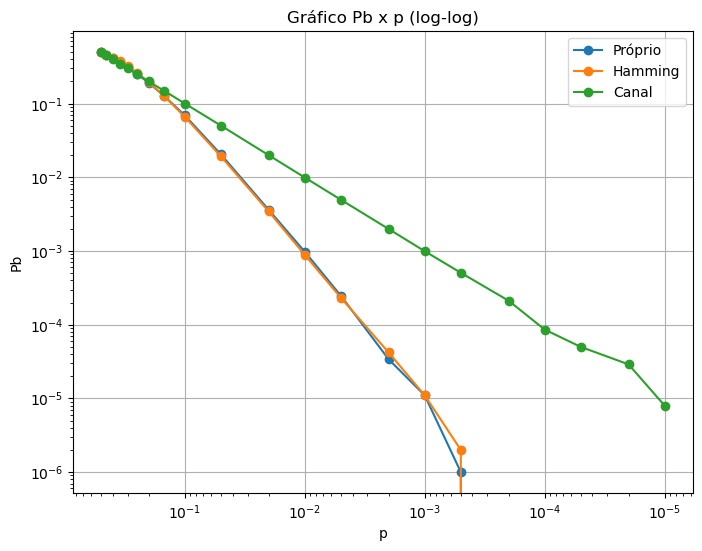

In [7]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plotando os dados
plt.loglog(probs, oerros, marker='o', label='Próprio')
plt.loglog(probs, herros, marker='o', label='Hamming')
plt.loglog(probs, cerros, marker='o', label='Canal')

# Configurando o título e os rótulos dos eixos
plt.title('Gráfico Pb x p (log-log)')
plt.xlabel('p')
plt.ylabel('Pb')

# Adicionando a legenda
plt.legend()

# Invertendo o eixo x
plt.gca().invert_xaxis()

# Exibindo o gráfico
plt.grid(True)
plt.show()

In [8]:
fact = 9
probs_reduced = probs[:fact]
oerros_reduced = oerros[:fact]
herros_reduced = herros[:fact]
cerros_reduced = cerros[:fact]

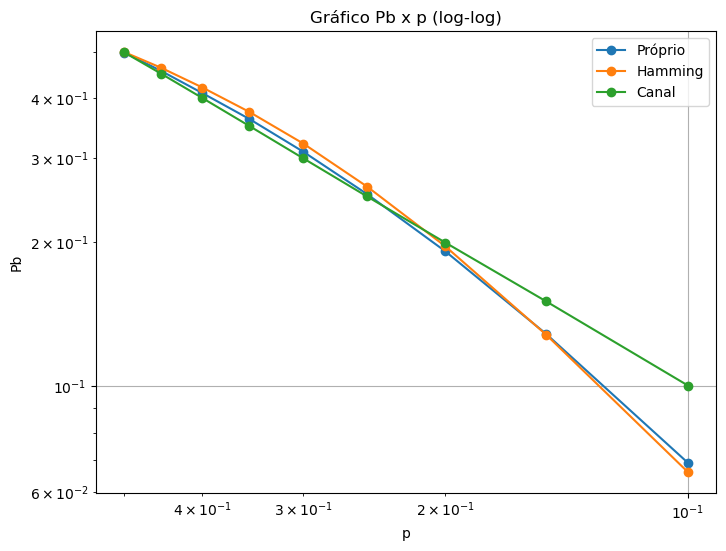

In [9]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plotando os dados
plt.loglog(probs_reduced, oerros_reduced, marker='o', label='Próprio')
plt.loglog(probs_reduced, herros_reduced, marker='o', label='Hamming')
plt.loglog(probs_reduced, cerros_reduced, marker='o', label='Canal')

# Configurando o título e os rótulos dos eixos
plt.title('Gráfico Pb x p (log-log)')
plt.xlabel('p')
plt.ylabel('Pb')

# Adicionando a legenda
plt.legend()

# Invertendo o eixo x
plt.gca().invert_xaxis()

# Exibindo o gráfico
plt.grid(True)
plt.show()